<a href="https://colab.research.google.com/github/Sanjiwani1wadhave/Assignment-4/blob/main/SLR_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving delivery_time.csv to delivery_time (1).csv


In [ ]:
data=pd.read_csv("delivery_time (1).csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


**EDA**

In [ ]:
data.shape

(21, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


**Data preprocessing**

In [ ]:
X=data.iloc[:,:-1].values #independent variable array
y=data.iloc[:,1].values #dependent variable vector

**Splitting the dataset**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2,random_state=0)


**Fitting the regression model**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

**Predicting the test set results**

In [ ]:
y_pred=regressor.predict(X_test)
y_pred

array([6.73686067, 4.02382575, 8.26294281, 4.87164916, 3.70589197])

In [ ]:
y_test

array([10,  3,  5,  4,  4])

# **Visualizing the results**

**Plot for the TRAIN**

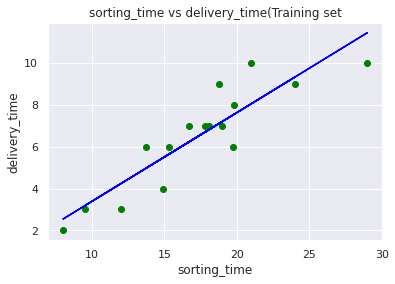

In [ ]:
plt.scatter(X_train,y_train,color='green')  # plotting the observation line
plt.plot(X_train, regressor.predict(X_train),color='blue')
plt.title("sorting_time vs delivery_time(Training set")

plt.xlabel("sorting_time")
plt.ylabel("delivery_time")
plt.show()

**Plot for the TEST**

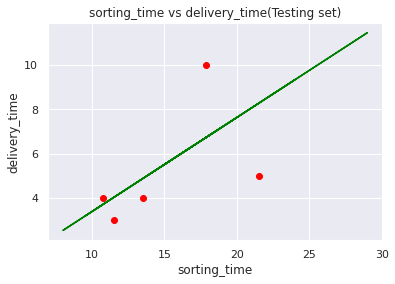

In [ ]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_train,regressor.predict(X_train),color='green')
plt.title("sorting_time vs delivery_time(Testing set)")

plt.xlabel("sorting_time")
plt.ylabel("delivery_time")
plt.show()

# **Simple model without any transformation**
**Train the Model using linear Regression**


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state =42)

In [ ]:
predict_reg = LinearRegression()

In [ ]:
predict_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(" Intercept value of Model is " ,predict_reg.intercept_)
print("Coefficient value of Model is ", predict_reg.coef_)

 Intercept value of Model is  -0.3292249777418226
Coefficient value of Model is  [0.37522491]


In [ ]:
y_pred = predict_reg.predict(X_test)

In [ ]:
pmsh_pf = pd.DataFrame({'Actual':y_test.flatten(), 'Predict': y_pred.flatten()})
pmsh_pf

,Actual,Predict
0,10,7.550498
1,7,6.466098
2,4,5.254122
3,4,4.736311
4,10,6.387301


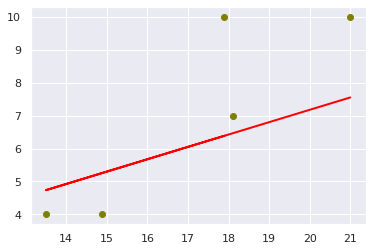

In [ ]:
plt.scatter(X_test, y_test,  color='olive')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

**Calculate Error Rate of the model.**

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R^2 Score :          ", metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 1.7173071781664517
Mean Squared Error: 4.290336284603159
Root Mean Squared Error: 2.071312695998158
R^2 Score :           0.40411996047178356


## **Logrithm Transformation**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [ ]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
data.shape

(21, 2)

In [ ]:
data.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [ ]:
y=data['Delivery Time']
X=data['Sorting Time']

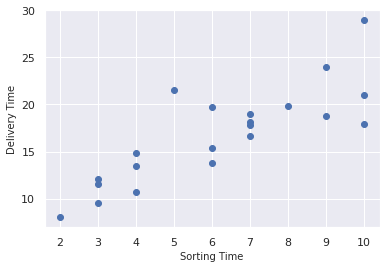

In [ ]:
plt.scatter(X,y)
plt.xlabel('Sorting Time',fontsize=10)
plt.ylabel('Delivery Time',fontsize=10)
plt.show()

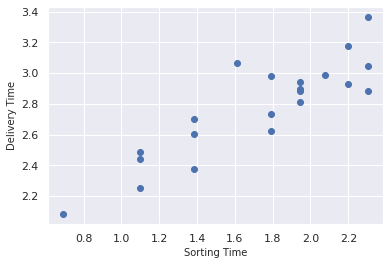

In [ ]:
log_y=np.log(y)
log_X=np.log(X)
plt.scatter(log_X,log_y)
plt.xlabel('Sorting Time',fontsize=10)
plt.ylabel('Delivery Time',fontsize=10)
plt.show()


In [ ]:
x=sm.add_constant(log_X)
results=sm.OLS(log_y,X).fit()
results.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.917
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              219.7
Date:                Thu, 22 Dec 2022   Prob (F-statistic):                    3.00e-12
Time:                        14:11:19   Log-Likelihood:                         -25.284
No. Observations:                  21   AIC:                                      52.57
Df Residuals:                      20   BIC:                                      53.61
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     0.4008      0.027     14.821      0.000       0.344       0.457
==============================================================================
Omnibus:                        2.572   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                1.346
Skew:                          -0.275   Prob(JB):                        0.510
Kurtosis:                       1.889   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **Exponential Transformation Model**

In [ ]:
X_e_log = data['Sorting Time'].values.reshape(-1,1)

In [ ]:
y_e_log=np.log(data['Delivery Time'].values.reshape(-1,1))

In [ ]:
X_train_exp, X_test_exp, Y_train_exp, Y_test_exp = train_test_split(X_e_log, y_e_log, test_size=0.2, random_state= 42)

In [ ]:
exp_model= LinearRegression()
exp_model.fit(X_train_exp, Y_train_exp)

LinearRegression()

In [ ]:
print(" Exponent Model Intercept value is ", exp_model.intercept_)
print(" Exponent model Coefficient value is ", exp_model.coef_)

 Exponent Model Intercept value is  [1.9917351]
 Exponent model Coefficient value is  [[0.12920274]]


In [ ]:
exp_model_pred= exp_model.predict(X_test_exp)
exp_model_pred

array([[3.28376247],
       [2.89615425],
       [2.50854604],
       [2.50854604],
       [3.28376247]])

In [ ]:
pmsh_exp = pd.DataFrame({'Actual':Y_test_exp.flatten(), 'Predict': exp_model_pred.flatten()})
pmsh_exp

,Actual,Predict
0,3.044522,3.283762
1,2.896464,2.896154
2,2.700018,2.508546
3,2.602690,2.508546
4,2.884801,3.283762


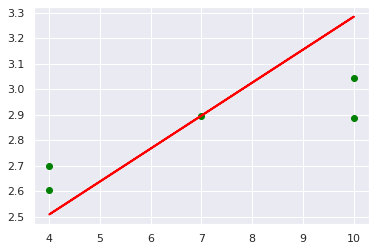

In [ ]:
plt.scatter(X_test_exp, Y_test_exp,  color='green')
plt.plot(X_test_exp, exp_model_pred, color='red', linewidth=2)
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_exp, exp_model_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_exp, exp_model_pred) )
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_exp, exp_model_pred)))
print("R^2 Score :          ", metrics.r2_score(Y_test_exp, exp_model_pred))

Mean Absolute Error: 0.18482548465812512
Mean Squared Error: 0.05238618256457228
Root Mean Squared Error: 0.2288802799818549
R^2 Score :           -1.1485016492474212


# **Quadratic Transformation Model**

In [ ]:
data.rename(columns = {'Sorting Time':'Sorting_Time', 'Delivery Time':'Delivery_Time'}, inplace = True)

In [ ]:
data

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
data['Square_Sorting_Time'] = data.apply(lambda row: row.Sorting_Time**2, axis =1 )
data

,Delivery_Time,Sorting_Time,Square_Sorting_Time
0,21.00,10,100.0
1,13.50,4,16.0
2,19.75,6,36.0
3,24.00,9,81.0
4,29.00,10,100.0
5,15.35,6,36.0
6,19.00,7,49.0
7,9.50,3,9.0
8,17.90,10,100.0
9,18.75,9,81.0


In [ ]:
X_q = data.iloc[:,data.columns != 'Sorting_Time']
Y_q = data.iloc[:,1]
X_train, X_test, Y_train, Y_test = train_test_split(X_q, Y_q, test_size=0.2, random_state= 42)
print(Y_test)

0     10
17     7
15     4
1      4
8     10
Name: Sorting_Time, dtype: int64


In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
print(" Intercept value of Model is " ,model.intercept_)

coeff_df = pd.DataFrame(model.coef_,X_q.columns ,columns=['Coefficient'])
print(coeff_df)

 Intercept value of Model is  2.235723309182123
                     Coefficient
Delivery_Time           0.036556
Square_Sorting_Time     0.075743


In [ ]:
y_pred_q_q = model.predict(X_test)

In [ ]:
df_qm = pd.DataFrame({'Actual':Y_test, 'Predicted': y_pred_q_q})
df_qm.head()

,Actual,Predicted
0,10,10.577669
17,7,6.609142
15,4,3.991555
1,4,3.941109
8,10,10.464347


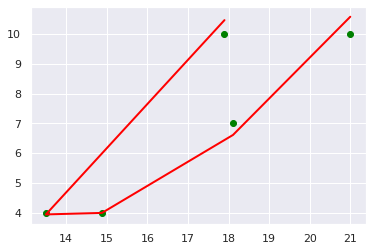

In [ ]:
x_t =np.array(X_test)
plt.scatter(x_t[:,0], Y_test,  color='green')
plt.plot(x_t[:,0], y_pred_q_q, color='red', linewidth=2)
plt.show()

Calculate Error Rate of the quadratic transformation model.

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred_q_q))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred_q_q) )
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_q_q)))
print("R^2 Score :          ", metrics.r2_score(Y_test, y_pred_q_q))

Mean Absolute Error: 0.3000420712352853
Mean Squared Error: 0.14112588204302096
Root Mean Squared Error: 0.37566724909555393
R^2 Score :           0.9803991830495804


# **Polynomial Transformation Model**

In [ ]:
data['Cube_Sorting_Time'] = data.apply(lambda row: row.Sorting_Time**3, axis =1 )
data

,Delivery_Time,Sorting_Time,Square_Sorting_Time,Cube_Sorting_Time
0,21.00,10,100.0,1000.0
1,13.50,4,16.0,64.0
2,19.75,6,36.0,216.0
3,24.00,9,81.0,729.0
4,29.00,10,100.0,1000.0
5,15.35,6,36.0,216.0
6,19.00,7,49.0,343.0
7,9.50,3,9.0,27.0
8,17.90,10,100.0,1000.0
9,18.75,9,81.0,729.0


In [ ]:
X_c = data.iloc[:,data.columns != 'Sorting_Time']
Y_c = data.iloc[:,1]
X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(X_c, Y_c, test_size=0.2, random_state= 42)
print(Y_test)

0     10
17     7
15     4
1      4
8     10
Name: Sorting_Time, dtype: int64


In [ ]:
cube_model = LinearRegression()
cube_model.fit(X_train_c, Y_train_c)

LinearRegression()

In [ ]:
print(" Intercept value of Cubic Model is " ,cube_model.intercept_)

coeff_df = pd.DataFrame(cube_model.coef_, X_c.columns, columns=['Coefficient'])
print(coeff_df)

 Intercept value of Cubic Model is  1.4680512536465695
                     Coefficient
Delivery_Time           0.017689
Square_Sorting_Time     0.172770
Cube_Sorting_Time      -0.009347


In [ ]:
y_pred_cube = cube_model.predict(X_test_c)

In [ ]:
df = pd.DataFrame({'Actual':Y_test_c, 'Predicted': y_pred_cube})
df.head()

,Actual,Predicted
0,10,9.769415
17,7,7.048074
15,4,3.897368
1,4,3.872958
8,10,9.714580


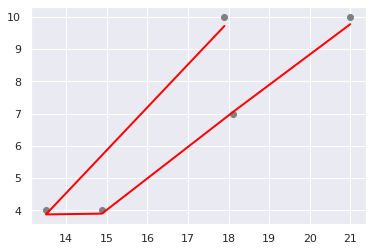

In [ ]:
x_t_c =np.array(X_test_c)
plt.scatter(x_t_c[:,0], Y_test_c,  color='gray')
plt.plot(x_t_c[:,0], y_pred_cube, color='red', linewidth=2)
plt.show()


Calculate Error Rate of the Polynomial Transformation Model

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_c, y_pred_cube))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_c, y_pred_cube) )
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_c, y_pred_cube)))
print("R^2 Score :          ", metrics.r2_score(Y_test_c, y_pred_cube))

Mean Absolute Error: 0.1587507652667166
Mean Squared Error: 0.03272370950015811
Root Mean Squared Error: 0.1808969582390984
R^2 Score :           0.9954550403472002
